In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from utils.exp_utils import list_concept_names, list_exp_names

In [2]:
base_path = "/home/jack/Code/Research/instree_analysis/experiment_image/scores"
exp_path = "/home/jack/Code/Research/instree_analysis/experiments"
dataset_name = "InsData_clip"
# dataset_name = "BackData_clip"
figsize_base = 7.5

exp_names = list_exp_names(dataset_name, exp_path)
cpt_names = list_concept_names(dataset_name)

exp_name_map = {
    0: "InspirationTree",
    1: "Proposed Method",
    2: "Ablation: Attention",
    3: "Ablation: Attention + RD",
    4: "Ablation: Attention + RD + EMA",
    5: "Ablation: RD"   
}

===== Experiment names for InsData_clip: =====
0 0_InspirationTree
1 1_AGTree
2 1_AGTree_Seed_1000
3 1_AGTree_Seed_111
4 1_AGTree_Seed_1234
5 2_Abla_Attn
6 2_Abla_Attn_RD
7 2_Abla_Attn_RD_EMA
8 2_Abla_RD
===== Total experiments: 9 =====
===== Concept names for InsData_clip: =====
buddha
canada_bear
cat_statue
colorful_teapot
decoritems_woodenpot
elephant
green_dall
mug_buildings
mug_skulls
physics_mug
plushie_tortoise
red_teapot
round_bird
===== Total concepts: 13 =====


In [6]:
def get_final_images(exp_path, dataset_name, exp_name, cpt_name, node='v0', seed=0, multiseed=False):
    """
    Get the final images for a given experiment.
    """
    image_path = os.path.join(exp_path, dataset_name, exp_name, "outputs", cpt_name, node, f"{node}_seed{seed}", "final_samples.jpg")
    if multiseed:
        image_path = os.path.join(exp_path, dataset_name, exp_name, "outputs", cpt_name, node, "final_samples.jpg")
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    
    img = cv2.imread(image_path)
    img = img[350:-400, 250:-200]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def show_one_output(img, title):
    """
    Show a single output image.
    """
    fig, ax = plt.subplots(1, 1, figsize=(figsize_base, figsize_base))
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')
    
    plt.show()

def show_one_output_node(img, title, node):
    x_unit = 454
    y_start = 90
    y_unit = 114
    n = 4
    if node == 'vl':
        x_start = 0
    elif node == 'vr':
        x_start = 547
    elif node == 'vl vr':
        x_start = 1093
    img = img[y_start:y_start+y_unit * n, x_start:x_start+x_unit]
    plt.figure(figsize=(figsize_base, figsize_base))
    plt.imshow(img)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()
    return img


def compare_outputs(images, titles=None):
    """
    Compare multiple output images side by side.
    
    Parameters:
        images (list): List of image arrays.
        titles (list, optional): List of titles for each image. Must match length of images or be None.
        figsize (tuple, optional): Figure size.
    """
    n = len(images)
    if titles is not None and len(titles) != n:
        raise ValueError("Length of titles must match length of images.")

    figsize = (figsize_base * 1.35 * n, figsize_base)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]
    
    for i in range(n):
        axes[i].imshow(images[i])
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
idx_to_cpr = [0, 1]
multiseed_idx = [0]
target_cpt_names = cpt_names
# target_cpt_names = ['red_teapot']

for cpt_name in target_cpt_names:
    img_list = [
        get_final_images(exp_path, dataset_name, exp_names[i], cpt_name, multiseed=True) if i in multiseed_idx
        else get_final_images(exp_path, dataset_name, exp_names[i], cpt_name)
        for i in idx_to_cpr]
    title_list = [exp_names[i] + " / " + cpt_name if i not in exp_name_map
                  else exp_name_map[i] + " / " + cpt_name
                  for i in idx_to_cpr]
    compare_outputs(img_list, title_list)
    # compare_outputs([img_list[0]], [title_list[0]])
    # compare_outputs([img_list[1]], [title_list[1]])

Experiment: 1_AGTree


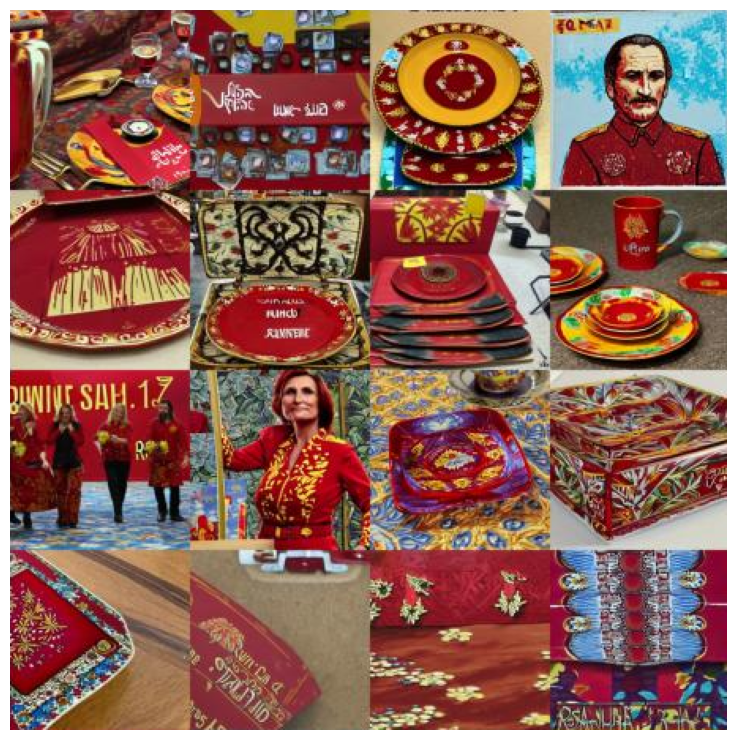

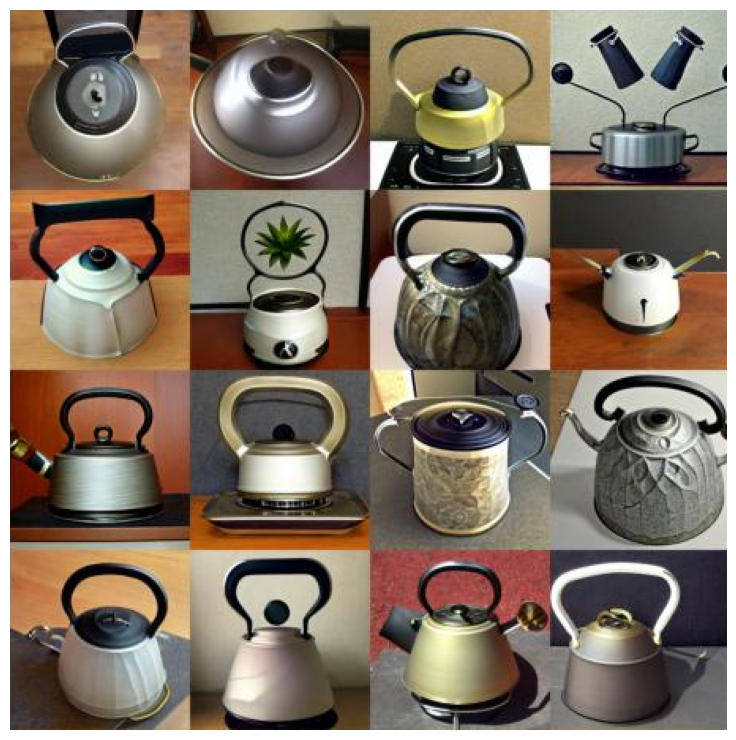

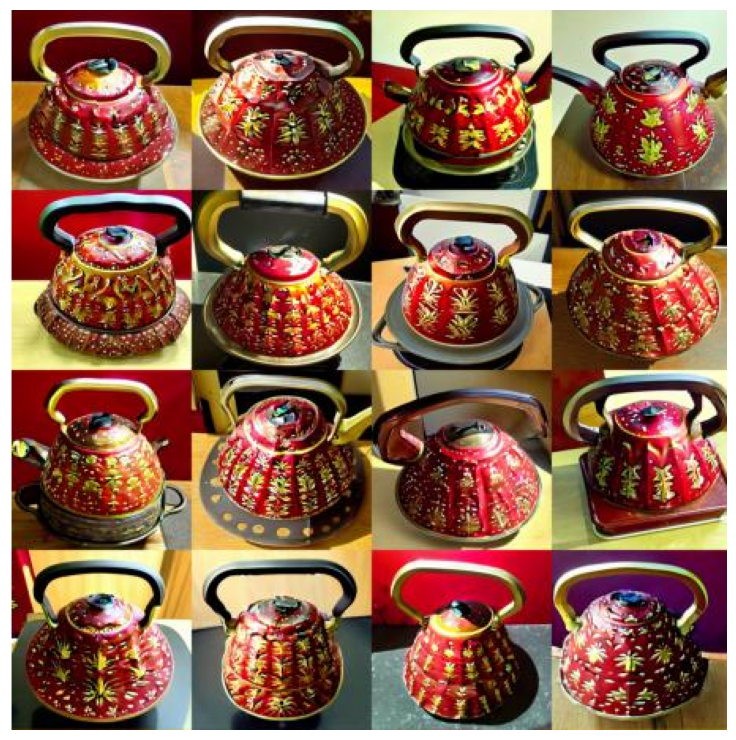

In [7]:
idx = 1
cpt_name = 'red_teapot'
multiseed_idx = [0]
print('Experiment:', exp_names[idx])

img = (get_final_images(exp_path, dataset_name, exp_names[idx], cpt_name, multiseed=True) if idx in multiseed_idx
        else get_final_images(exp_path, dataset_name, exp_names[idx], cpt_name))
title = exp_names[idx] + " / " + cpt_name if idx not in exp_name_map else exp_name_map[idx] + " / " + cpt_name

img_vl = show_one_output_node(img, "", 'vl')
img_vr = show_one_output_node(img, "", 'vr')
img_vlvr = show_one_output_node(img, "", 'vl vr')

In [12]:
output_folder = 'output/'

def save_image(img, filename):
    plt.imsave(filename, img)

multiseed_idx = [0]
for idx in [0, 1]:
    for cpt_name in cpt_names:
        img = (get_final_images(exp_path, dataset_name, exp_names[idx], cpt_name, multiseed=True) if idx in multiseed_idx
                else get_final_images(exp_path, dataset_name, exp_names[idx], cpt_name))
        title = exp_names[idx] + " / " + cpt_name if idx not in exp_name_map else exp_name_map[idx] + " / " + cpt_name

        img_vl = show_one_output_node(img, "", 'vl')
        img_vr = show_one_output_node(img, "", 'vr')
        os.makedirs(os.path.join(output_folder, exp_names[idx]), exist_ok=True)
        save_image(img_vl, os.path.join(output_folder, exp_names[idx], f"{cpt_name}_vl.jpg"))
        save_image(img_vr, os.path.join(output_folder, exp_names[idx], f"{cpt_name}_vr.jpg"))